In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#Import time_serires seasonal 
from statsmodels.tsa.seasonal import seasonal_decompose 

In [ ]:
df1=pd.read_csv('airpassenger.csv')

In [10]:
df1.shape

(144, 2)

In [11]:
df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [14]:
# we are providing inputs to tell pandas that we are trying to work with time series.
# data type is change YEAR_Month column

df1=pd.read_csv('airpassenger.csv',parse_dates=['Year-Month'])

In [15]:
df1

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [17]:
# check datatypes
df1.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [18]:
# it is recommnded that we make our time series reference as the index
df1=pd.read_csv('airpassenger.csv',parse_dates=['Year-Month'],index_col=['Year-Month'])

In [19]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [20]:
#we can canveniently do slicing i.e. obtain data for a specific time period.
# only 1951 t 1952 data show method 
df1['1951-04-01':'1952-03-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [22]:
# we can check values corresponding to a specific time point 
#---------------------------------------------------------------------
# only one value find using LOC method 

df1.loc['1960-05-01']

Pax    472
Name: 1960-05-01 00:00:00, dtype: int64

<Figure size 1440x1440 with 0 Axes>

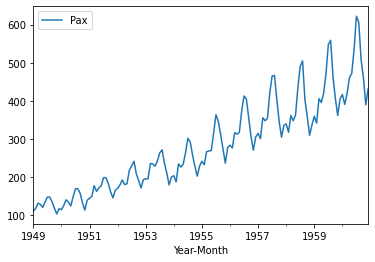

In [25]:
# plot the time-series
df1.plot()
plt.show()

In [27]:
# increase the figure size 
from pylab import rcParams

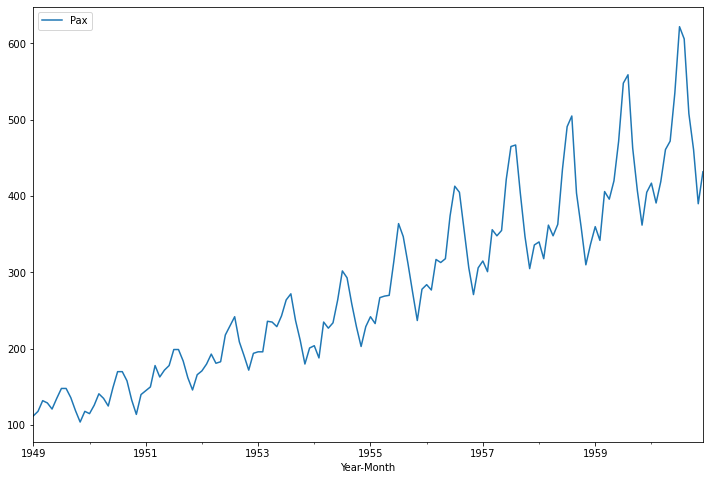

In [28]:
rcParams['figure.figsize']=12,8
df1.plot()
plt.show()

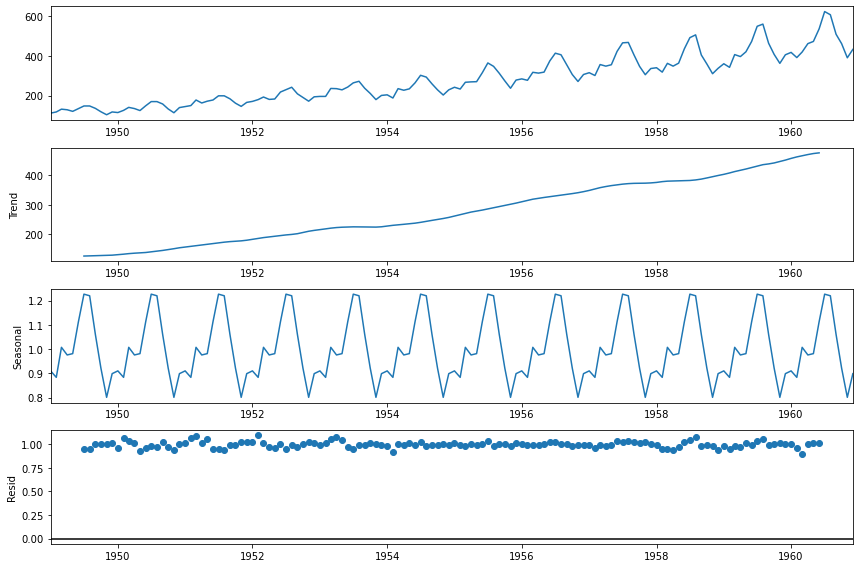

In [30]:
# Decompose the time series multiplicatively
df1.mul_decompose=seasonal_decompose(df1,model="multiplicative")
df1.mul_decompose.plot()
plt.show()

In [31]:
# Let's try to do log Transformation
df1_log=df1.copy()

In [32]:
df1_log['Pax']=np.log(df1)

In [34]:
df1_log.Pax

Year-Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

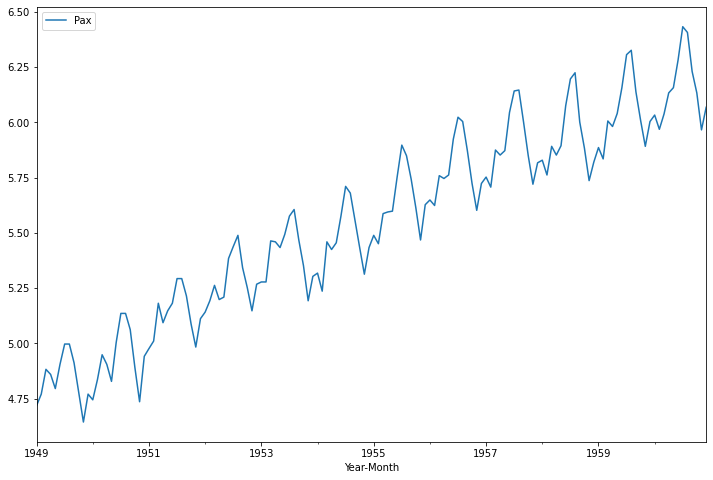

In [35]:
# Visualize the log transformed series 
df1_log.plot()
plt.show()

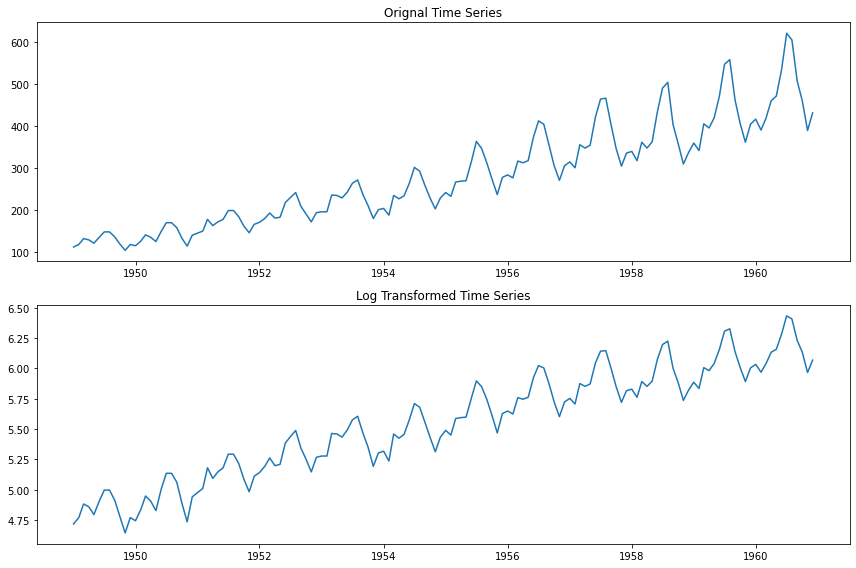

In [37]:
#Compare with original series 
plt.subplot(2,1,1)
plt.title('Orignal Time Series')
plt.plot(df1)


plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()
